In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


portfolio = pd.read_json("portfolio.json", orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [43]:
sns.set()

In [38]:
portfolio

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


1. Onehot encoding for "channels"
2. combine "reward", "duration", "difficulty" and "offer_type" together to create a new var


In [29]:
def onehot_encoding_channels(portfolio_df):
    channels = ['email', "mobile", "social", "web"]
    for channel in channels:
        portfolio_df[channel] = portfolio_df.channels.apply(lambda x: channel in x ) * 1
    portfolio_df = portfolio_df.drop("channels", axis = 1)
    
    return portfolio_df

def new_portfolio_name(portfolio_df):
    portfolio_df['name'] = portfolio_df.offer_type.astype(str) + "_" + portfolio_df.difficulty.astype(str) + "_"  + portfolio_df.reward.astype(str) + "_" + portfolio_df.duration.astype(str)
    return portfolio_df

def preprocessing_portfolio(portfolio_df):
    portfolio_df = onehot_encoding_channels(portfolio_df)
    portfolio_df = new_portfolio_name(portfolio_df)
    return portfolio_df


In [30]:
portfolio_clean = preprocessing_portfolio(portfolio)

In [31]:
portfolio_clean

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo_10_10_7
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational_0_0_4
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo_5_5_7
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount_20_5_10
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_7_3_7
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_10_2_10
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational_0_0_3
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount_10_2_7


In [37]:
portfolio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
reward        10 non-null int64
difficulty    10 non-null int64
duration      10 non-null int64
offer_type    10 non-null object
id            10 non-null object
email         10 non-null int32
mobile        10 non-null int32
social        10 non-null int32
web           10 non-null int32
name          10 non-null object
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


Well, there are 10 offers for portfolio

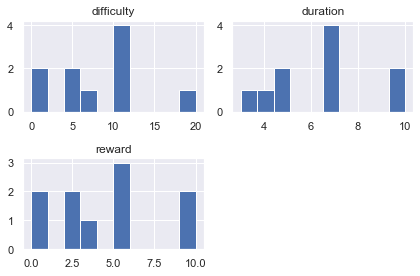

In [46]:
portfolio_clean[['reward', 'difficulty','duration']].hist()
plt.tight_layout()

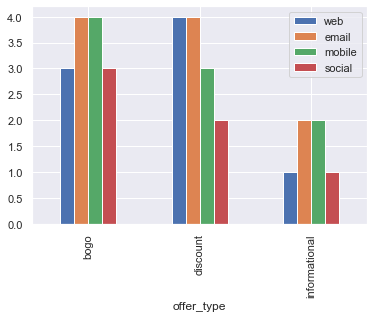

In [62]:
channels = ['web', 'email', 'mobile', 'social']
portfolio_clean.groupby('offer_type').sum()[channels].plot(kind = 'bar')

## Profile

In [63]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [64]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [68]:
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


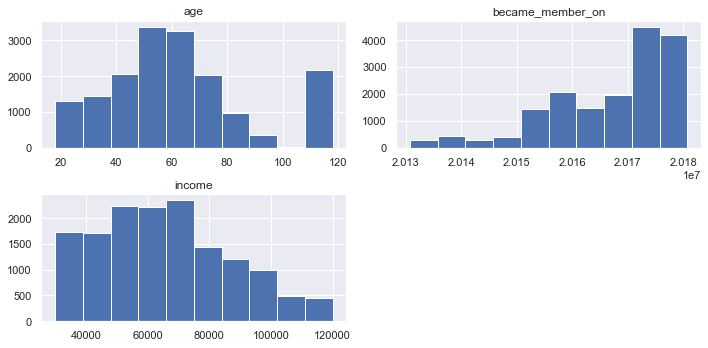

In [74]:
profile[['age','income', 'became_member_on']].hist(figsize = (10,5))
plt.tight_layout()

In [80]:
profile[profile['age'] == 118]['age'].value_counts()

118    2175
Name: age, dtype: int64

In [85]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

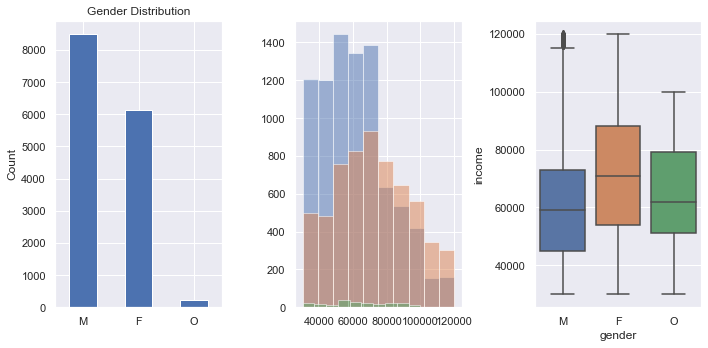

In [108]:
""" GENDER """

f, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize = (10,5))

profile.gender.value_counts().plot(kind = 'bar', ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_title("Gender Distribution")
ax1.set_ylabel("Count")


ax2.hist(profile[profile.gender == 'M']['income'], alpha = 0.5, label = 'M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha = 0.5, label = 'F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha = 0.5, label = 'O')

sns.boxplot("gender", "income",data = profile, order = ['M', 'F', 'O'] ,ax = ax3)

plt.tight_layout()


In [114]:
profile.groupby('gender').describe()['income']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,71306.412139,22338.353773,30000.0,54000.0,71000.0,88000.0,120000.0
M,8484.0,61194.601603,20069.517615,30000.0,45000.0,59000.0,73000.0,120000.0
O,212.0,63287.735849,18938.594726,30000.0,51000.0,62000.0,79250.0,100000.0


## Missing data